<a href="https://colab.research.google.com/github/manishvilla7/BAN210/blob/main/Breast_Cancer_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from scipy import stats
from scipy.stats import f_oneway

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data",
                 header=None)
# The .data files has only the values and not the column headings, so we will add the code to refer the right columns label from the .names file
df.columns = ["class", "age", "menopause", "tumor_size",
                    "inv_nodes", "node_caps", "deg_malig",
                    "breast", "breast_quad", "irradiat"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor_size   286 non-null    object
 4   inv_nodes    286 non-null    object
 5   node_caps    286 non-null    object
 6   deg_malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast_quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [ ]:
for columns in df.columns:
    print(df[columns].value_counts())
    print('')

no-recurrence-events    201
recurrence-events        85
Name: class, dtype: int64

50-59    96
40-49    90
60-69    57
30-39    36
70-79     6
20-29     1
Name: age, dtype: int64

premeno    150
ge40       129
lt40         7
Name: menopause, dtype: int64

30-34    60
25-29    54
20-24    50
15-19    30
10-14    28
40-44    22
35-39    19
0-4       8
50-54     8
5-9       4
45-49     3
Name: tumor_size, dtype: int64

0-2      213
3-5       36
6-8       17
9-11      10
15-17      6
12-14      3
24-26      1
Name: inv_nodes, dtype: int64

no     222
yes     56
?        8
Name: node_caps, dtype: int64

2    130
3     85
1     71
Name: deg_malig, dtype: int64

left     152
right    134
Name: breast, dtype: int64

left_low     110
left_up       97
right_up      33
right_low     24
central       21
?              1
Name: breast_quad, dtype: int64

no     218
yes     68
Name: irradiat, dtype: int64



In [ ]:
df.replace("?", np.nan, inplace=True)
df.isnull().sum()

class          0
age            0
menopause      0
tumor_size     0
inv_nodes      0
node_caps      8
deg_malig      0
breast         0
breast_quad    1
irradiat       0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

class          0
age            0
menopause      0
tumor_size     0
inv_nodes      0
node_caps      0
deg_malig      0
breast         0
breast_quad    0
irradiat       0
dtype: int64

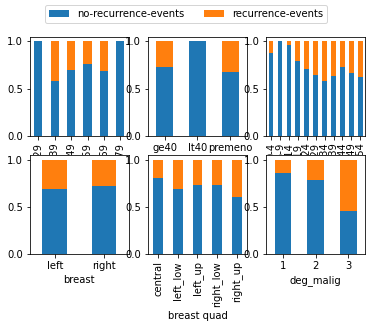

In [ ]:
fig, ax = plt.subplots(2, 3)

long = df[["class", "age"]].groupby(["age", "class"]).size().reset_index(name="count").pivot(index="age", columns="class", values="count")
long["total"] = long.sum(axis=1)
long["no-recurrence-events"] = long["no-recurrence-events"] / long["total"]
long["recurrence-events"] = long["recurrence-events"] / long["total"]
long.drop("total", axis=1, inplace=True)
long.plot(kind="bar", stacked=True, ax=ax[0,0])
ax[0,0].set_xlabel("age")
ax[0,0].get_legend().remove()

long = df[["class", "menopause"]].groupby(["menopause", "class"]).size().reset_index(name="count").pivot(index="menopause", columns="class", values="count")
long["total"] = long.sum(axis=1)
long["no-recurrence-events"] = long["no-recurrence-events"] / long["total"]
long["recurrence-events"] = long["recurrence-events"] / long["total"]
long.drop("total", axis=1, inplace=True)
long.plot(kind="bar", stacked=True, rot=0, ax=ax[0,1])
ax[0,1].set_xlabel("menopause")
ax[0,1].get_legend().remove()

long = df[["class", "tumor_size"]].groupby(["tumor_size", "class"]).size().reset_index(name="count").pivot(index="tumor_size", columns="class", values="count")
long["total"] = long.sum(axis=1)
long["no-recurrence-events"] = long["no-recurrence-events"] / long["total"]
long["recurrence-events"] = long["recurrence-events"] / long["total"]
long.drop("total", axis=1, inplace=True)
order = ["0-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54"]
long.loc[order].plot(kind="bar", stacked=True, ax=ax[0,2])
ax[0,2].set_xlabel("tumor size")
ax[0,2].get_legend().remove()

long = df[["class", "breast"]].groupby(["breast", "class"]).size().reset_index(name="count").pivot(index="breast", columns="class", values="count")
long["total"] = long.sum(axis=1)
long["no-recurrence-events"] = long["no-recurrence-events"] / long["total"]
long["recurrence-events"] = long["recurrence-events"] / long["total"]
long.drop("total", axis=1, inplace=True)
long.plot(kind="bar", stacked=True, rot=0, ax=ax[1,0])
ax[1,0].set_xlabel("breast")
ax[1,0].get_legend().remove()

long = df[["class", "breast_quad"]].groupby(["breast_quad", "class"]).size().reset_index(name="count").pivot(index="breast_quad", columns="class", values="count")
long["total"] = long.sum(axis=1)
long["no-recurrence-events"] = long["no-recurrence-events"] / long["total"]
long["recurrence-events"] = long["recurrence-events"] / long["total"]
long.drop("total", axis=1, inplace=True)
long.plot(kind="bar", stacked=True, ax=ax[1,1])
ax[1,1].set_xlabel("breast quad")
ax[1,1].get_legend().remove()

long = df[["class", "deg_malig"]].groupby(["deg_malig", "class"]).size().reset_index(name="count").pivot(index="deg_malig", columns="class", values="count")
long["total"] = long.sum(axis=1)
long["no-recurrence-events"] = long["no-recurrence-events"] / long["total"]
long["recurrence-events"] = long["recurrence-events"] / long["total"]
long.drop("total", axis=1, inplace=True)
long.plot(kind="bar", stacked=True, rot=0, ax=ax[1,2])
ax[1,2].set_xlabel("deg_malig")
ax[1,2].get_legend().remove()
handles, labels = ax[1,2].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=2)

In [ ]:
df[df.select_dtypes("object").columns] = df.select_dtypes("object").astype("category")

In [ ]:
lb_tumor = LabelEncoder()
lb_tumor.fit(["0-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54"])
df["tumor_size"] = lb_tumor.transform(df["tumor_size"])

lb_age = LabelEncoder()
lb_age.fit(["20-29", "30-39", "40-49", "50-59", "60-69", "70-79"])
df["age"] = lb_age.transform(df["age"])

lb_nodes = LabelEncoder()
lb_nodes.fit(["0-2", "3-5", "6-8", "9-11", "12-14", "15-17", "24-26"])
df["inv_nodes"] = lb_nodes.transform(df["inv_nodes"])

In [ ]:
df["node_caps"].value_counts()
# use binary since there are only two possible values and order doesn't matter
df["node_caps"] = df["node_caps"].cat.codes
df["breast"].value_counts()
df["breast"] = df["breast"].cat.codes
df["irradiat"].value_counts()
df["irradiat"] = df["irradiat"].cat.codes
df["breast_quad"].value_counts()
# hot coding used since more than 2 distinct values present and order doesn't matter
hot = pd.get_dummies(df["breast_quad"], prefix="breast_quad")
df = df.join(hot)

df["class"].value_counts()
# we are converting like 1 means recurrence and 0 means no-recurrence
lb_class = LabelEncoder()
lb_class.fit(["no-recurrence-events", "recurrence-events"])
df["class"] = lb_class.transform(df["class"])

df["menopause"].value_counts()
# hot coding used since more than 2 distinct values present and order doesn't matter
hot = pd.get_dummies(df["menopause"], prefix="menopause")
df = df.join(hot)


In [ ]:
df.head(20)

,class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat,breast_quad_central,breast_quad_left_low,breast_quad_left_up,breast_quad_right_low,breast_quad_right_up,menopause_ge40,menopause_lt40,menopause_premeno
0,0,1,premeno,5,0,0,3,0,left_low,0,0,1,0,0,0,0,0,1
1,0,2,premeno,3,0,0,2,1,right_up,0,0,0,0,0,1,0,0,1
2,0,2,premeno,3,0,0,2,0,left_low,0,0,1,0,0,0,0,0,1
3,0,4,ge40,2,0,0,2,1,left_up,0,0,0,1,0,0,1,0,0
4,0,2,premeno,0,0,0,2,1,right_low,0,0,0,0,1,0,0,0,1
5,0,4,ge40,2,0,0,2,0,left_low,0,0,1,0,0,0,1,0,0
6,0,3,premeno,4,0,0,2,0,left_low,0,0,1,0,0,0,0,0,1
7,0,4,ge40,3,0,0,1,0,left_low,0,0,1,0,0,0,1,0,0
8,0,2,premeno,10,0,0,2,0,left_low,0,0,1,0,0,0,0,0,1
9,0,2,premeno,3,0,0,2,1,left_up,0,0,0,1,0,0,0,0,1


In [ ]:
f_oneway(df["class"],df["node_caps"])

F_onewayResult(statistic=6.1057624238992005, pvalue=0.013775033100784028)

In [ ]:
f_oneway(df["class"],df["age"])

F_onewayResult(statistic=1245.889352818371, pvalue=1.1767312623041968e-143)

In [ ]:
f_oneway(df["class"],df["tumor_size"])

F_onewayResult(statistic=797.481701358995, pvalue=3.115655853115249e-109)

In [ ]:
f_oneway(df["class"],df["irradiat"])

F_onewayResult(statistic=3.411490789563795, pvalue=0.06527890445443618)

In [ ]:
f_oneway(df["class"],df["inv_nodes"])

F_onewayResult(statistic=38.722711712217304, pvalue=9.665842187336981e-10)

In [ ]:
# split data set into 60-40 train-test arrangement
x = df[["age", "tumor_size", "inv_nodes", "node_caps", "deg_malig", "menopause_ge40", "menopause_lt40",
        "menopause_premeno", "breast_quad_central", "breast_quad_left_low", "breast_quad_left_up",
        "breast_quad_right_low", "breast_quad_right_up", "irradiat"]]
y = df["class"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=8)

In [ ]:
results = pd.DataFrame({"model": object(), "accuracy": float(), "f1": float()}, index=[])

In [ ]:
#define the parameters KNN
leaf_size = list(range(1, 10))
n_neighbors = list(range(1, 10))
p = [1,2]
parameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
neigh = KNeighborsClassifier()
neigh_grid = GridSearchCV(neigh, parameters, scoring="f1")
neigh_best = neigh_grid.fit(x_train, y_train)
parameters_best = neigh_best.best_estimator_.get_params()
neigh = KNeighborsClassifier(n_neighbors=parameters_best["n_neighbors"],
                             leaf_size=parameters_best["leaf_size"],
                             p=parameters_best["p"])
neigh.fit(x_train, y_train)
yhat_neigh = neigh.predict(x_test)
results = results.append({"model": "KNN", "accuracy": metrics.accuracy_score(y_test, yhat_neigh), "f1": metrics.f1_score(y_test, yhat_neigh)}, ignore_index=True)
results

,model,accuracy,f1
0,KNN,0.693694,0.451613


In [ ]:
# define parameters
c = [0.001, 0.01, 0.1, 1, 10, 100, 500]
parameters = dict(C=c)
lr = LogisticRegression(max_iter=1000)
log_grid = GridSearchCV(lr, parameters, scoring="f1")
log_best = log_grid.fit(x_train, y_train)
parameters_best = log_best.best_estimator_.get_params()
lr = LogisticRegression(C=parameters_best["C"], max_iter=500)
lr.fit(x_train, y_train)
yhat_log = lr.predict(x_test)
results = results.append({"model": "Logistic Regression", "accuracy": metrics.accuracy_score(y_test, yhat_log), "f1": metrics.f1_score(y_test, yhat_log)}, ignore_index=True)
results.tail(1)

,model,accuracy,f1
2,Logistic Regression,0.774775,0.545455


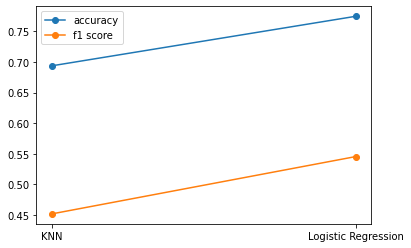

In [ ]:
plt.plot(results["model"], results["accuracy"], '-o', label="accuracy")
plt.plot(results["model"], results["f1"], '-o', label="f1 score")
plt.legend()

In [ ]:
X, y = make_classification(n_samples=286, n_features=10)
# cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = KNeighborsClassifier()
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print("Model: KNN " 'Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Model: KNN Accuracy: 0.864 (0.051)


In [ ]:

X, y = make_classification(n_samples=286, n_features=10) 
# cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = LogisticRegression()
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print("Model: Logistic Regression "'Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Model: Logistic Regression Accuracy: 0.937 (0.042)
